## Phenotype phase plane analysis


### Import the required libraries and the model.

In [342]:
import numpy as np
from cobra.io import read_sbml_model
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


model = read_sbml_model('2018_ATCC1015_GSM_iJB1325.xml') #The model is refered from (Brandl, J., Aguilar-Pontes, M. V., Schape, P., Norregaard, A., Arvas, M., Ram, A. F. J., Meyer, V., Tsang, A., de Vries, R. P., & Andersen, M. R. (2018). A community-driven reconstruction of the Aspergillus niger metabolic network. Fungal Biology and Biotechnology, 5, 16. )

C:\Users\boysa\AppData\Local\Temp\ipykernel_13032\348595974.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
'' is not a valid SBML 'SId'.


### Media setup

In [343]:
#Add extracellular metanolites
PNTOe = Metabolite('PNTOe', formula='C9H17NO5', name='(R)-Pantothenate', compartment='e') 
model.add_metabolites([PNTOe])

DHFe = Metabolite('DHFe', formula='C19H21N7O6', name='7,8-Dihydrofolate', compartment='e') 
model.add_metabolites([DHFe])

PABAe = Metabolite('PABAe', formula='C7H7NO2', name='4-Aminobenzoate', compartment='e') 
model.add_metabolites([PABAe])

PLe = Metabolite('PLe', formula='C8H9NO3', name='Pyridoxal', compartment='e') 
model.add_metabolites([PLe])

RIBOFLAVe = Metabolite('RIBOFLAVe', formula='C17H20N4O6', name='Riboflavin', compartment='e') 
model.add_metabolites([RIBOFLAVe])

#Add transport reactions
r2392 = Reaction('r2392')
r2392.name = '(R)-Pantothenate transport'
r2392.subsystem = "Transport"
r2392.lower_bound = -1000
r2392.add_metabolites({PNTOe: -1.0, model.metabolites.PNTO: 1.0})

r2393 = Reaction('r2393')
r2393.name = '7,8-Dihydrofolate transport'
r2393.lower_bound = -1000
r2393.subsystem = 'Transport'
r2393.add_metabolites({DHFe: -1.0, model.metabolites.DHF: 1.0})

r2394 = Reaction('r2394')
r2394.name = '4-Aminobenzoate transport'
r2394.lower_bound = -1000
r2394.subsystem = 'Transport'
r2394.add_metabolites({PABAe: -1.0, model.metabolites.PABA: 1.0})

r2395 = Reaction('r2395')
r2395.name = 'Pyridoxal transport'
r2395.lower_bound = -1000
r2395.subsystem = 'Transport'
r2395.add_metabolites({PLe: -1.0, model.metabolites.PL: 1.0})

r2396 = Reaction('r2396')
r2396.name = 'Riboflavin transport'
r2396.lower_bound = -1000
r2396.subsystem = 'Transport'
r2396.add_metabolites({RIBOFLAVe: -1.0, model.metabolites.RIBOFLAV: 1.0})

r2397 = Reaction('r2397')
r2397.name = 'Copper transport'
r2397.lower_bound = -1000
r2397.subsystem = 'Transport'
r2397.add_metabolites({model.metabolites.CUe: -1.0, model.metabolites.CU: 1.0})

#Add boundary conditions
model.add_boundary(model.metabolites.PNTOe, type="exchange", reaction_id= "BOUNDARY_PNTOe")
model.add_boundary(model.metabolites.DHFe, type="exchange", reaction_id= "BOUNDARY_DHFe")
model.add_boundary(model.metabolites.PABAe, type="exchange", reaction_id= "BOUNDARY_PABAe")
model.add_boundary(model.metabolites.PLe, type="exchange", reaction_id= "BOUNDARY_PLe")
model.add_boundary(model.metabolites.RIBOFLAVe, type="exchange", reaction_id= "BOUNDARY_RIBOFLAVe")
model.add_boundary(model.metabolites.CUe, type="exchange", reaction_id= "BOUNDARY_CUe")

medium_blank = {key: 0 for key in model.medium}
YESmedium = medium_blank # Setup the object for YESmedium

#Set the concentration for the amino acids
YESmedium['BOUNDARY_GLCe'] = 20 
# YESmedium['BOUNDARY_ALAe'] = 10
# YESmedium['BOUNDARY_ARGe'] = 10
# YESmedium['BOUNDARY_ASPe'] = 10
# YESmedium['BOUNDARY_CYSe'] = 10
# YESmedium['BOUNDARY_GLUe'] = 10
# YESmedium['BOUNDARY_GLYe'] = 10
# YESmedium['BOUNDARY_HISe'] = 10
# YESmedium['BOUNDARY_ILEe'] = 10
# YESmedium['BOUNDARY_LEUe'] = 10
# YESmedium['BOUNDARY_LYSe'] = 10
# YESmedium['BOUNDARY_METe'] = 10
# YESmedium['BOUNDARY_PHEe'] = 10
# YESmedium['BOUNDARY_PROe'] = 10
# YESmedium['BOUNDARY_SERe'] = 10
# YESmedium['BOUNDARY_THRe'] = 10
# YESmedium['BOUNDARY_TRPe'] = 10
# YESmedium['BOUNDARY_TYRe'] = 10
# YESmedium['BOUNDARY_VALe'] = 10

#Set the concentration for the supplements
YESmedium['BOUNDARY_NH4e'] = 5 #Ammonium  
YESmedium['BOUNDARY_SLFe'] = 5.5 #Sulfate
YESmedium['BOUNDARY_BTe'] = 2/10**6 #Biotin 
YESmedium['BOUNDARY_PNTOe'] = 400/10**6 #Pantothenic Acid
YESmedium['BOUNDARY_DHFe'] = 2/10**6 #Folic acid
YESmedium['BOUNDARY_MYOIe'] = 4000/10**6 #myo-Inositol
YESmedium['BOUNDARY_NICAe'] = 800/10**6 #Nicotinate
YESmedium['BOUNDARY_PABAe'] = 400/10**6 #4-Aminobenzoate
YESmedium['BOUNDARY_PLe'] = 800/10**6 #Pyridoxal
YESmedium['BOUNDARY_RIBOFLAVe'] = 200/10**6 #Riboflavin
YESmedium['BOUNDARY_THIAe'] = 800/10**6 #Thiamine
YESmedium['BOUNDARY_CUe'] = 80/10**6 #Copper
YESmedium['BOUNDARY_Ke'] = 2 #Potassium
YESmedium['BOUNDARY_FE2e'] = 200/10**6 #Ferric 
YESmedium['BOUNDARY_MNe'] = 400/10**6 #Manganese
YESmedium['BOUNDARY_MOe'] = 200/10**6 #Molybdate
YESmedium['BOUNDARY_ZNe'] = 400/10**6 #Zinc
YESmedium['BOUNDARY_PIe'] = 1 #Phosphate
YESmedium['BOUNDARY_CAe'] = 0.4 #Calcium 

#Set the condition
YESmedium['BOUNDARY_H2Oe'] = 1000 #Water
YESmedium['BOUNDARY_O2e'] = 1000 #Oxygen 

# Setting YES as control medium
model.medium = YESmedium

model.reactions.BOUNDARY_GLCe.bonds = -20,1000

### Calculation Phenotypic phase planes (PPP)

In [345]:
#Growth rate PPP analysis
Growth_rate_PPP = production_envelope(model,
                    reactions=[model.reactions.BOUNDARY_GLCe, model.reactions.BOUNDARY_O2e],
                    objective=model.reactions.DRAIN_Biomass)

#Replacing Nan values in flux
Growth_rate_PPP.flux_maximum = np.nan_to_num(Growth_rate_PPP.flux_maximum , nan=0)

#Look into the result of flux
Growth_rate_PPP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,BOUNDARY_GLCe,BOUNDARY_O2e
0,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,0.0,9.243167,0.0,0.0,-20.000000,-283.139590
1,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,0.0,9.280062,0.0,0.0,-20.000000,-268.237506
2,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,0.0,9.316957,0.0,0.0,-20.000000,-253.335422
3,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,0.0,9.353852,0.0,0.0,-20.000000,-238.433339
4,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,0.0,9.390747,0.0,0.0,-20.000000,-223.531255
...,...,...,...,...,...,...,...,...,...
395,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,NaN,NaN,0.003333,-59.608335
396,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,NaN,NaN,0.003333,-44.706251
397,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,NaN,NaN,0.003333,-29.804167
398,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,NaN,NaN,0.003333,-14.902084


In [350]:
#yanuthone D production PPP analysis
yanD_PPP = production_envelope(model,
                    reactions=[model.reactions.BOUNDARY_GLCe, model.reactions.DRAIN_Biomass],
                    objective=model.reactions.r1976)

#Replacing Nan values in flux
yanD_PPP.flux_maximum = np.nan_to_num(yanD_PPP.flux_maximum , nan=0)
yanD_PPP.carbon_yield_maximum = np.nan_to_num(yanD_PPP.carbon_yield_maximum , nan=0)

#Look into the result of flux
yanD_PPP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,BOUNDARY_GLCe,DRAIN_Biomass
0,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,NaN,3.190186,0.744208,NaN,-20.000000,0.000000
1,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,NaN,3.092758,0.721475,NaN,-20.000000,0.063668
2,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,NaN,2.995318,0.698740,NaN,-20.000000,0.127336
3,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,NaN,2.897879,0.676005,NaN,-20.000000,0.191003
4,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",0.0,0.0,NaN,2.800439,0.653270,NaN,-20.000000,0.254671
...,...,...,...,...,...,...,...,...,...
395,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,0.000000,NaN,0.003333,0.955017
396,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,0.000000,NaN,0.003333,1.018685
397,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,0.000000,NaN,0.003333,1.082353
398,"BOUNDARY_GLCe, BOUNDARY_NICAe, BOUNDARY_MYOIe,...",NaN,NaN,NaN,0.000000,0.000000,NaN,0.003333,1.146021


### Function to determine the Linear of optimality (LO)

In [351]:
# Euclidean distance function
def dist(a, b):
    return distance.euclidean(a[:2], b[:2])

# Dijkstra's algorithm for finding the steepest path to the highest value
def dijkstra(start, end, data):
    queue = [(0, start, [])]
    visited = set()
    heapq.heapify(queue)
    while queue:
        (cost, current, path) = heapq.heappop(queue)
        if current in visited:
            continue
        if current == end:
            return path + [current]
        visited.add(current)
        neighbors = [(c, dist(current, c)) for c in data if c not in visited]
        for neighbor, weight in neighbors:
            heapq.heappush(queue, (cost + weight, neighbor, path + [current]))
    return []

### Visualization of Phenotypic phase planes analysis

C:\Users\boysa\AppData\Local\Temp\ipykernel_13032\1134399738.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "20", "17.5", "15", "12.5", "10", "7.5", "5.0", "2.5", "0"])


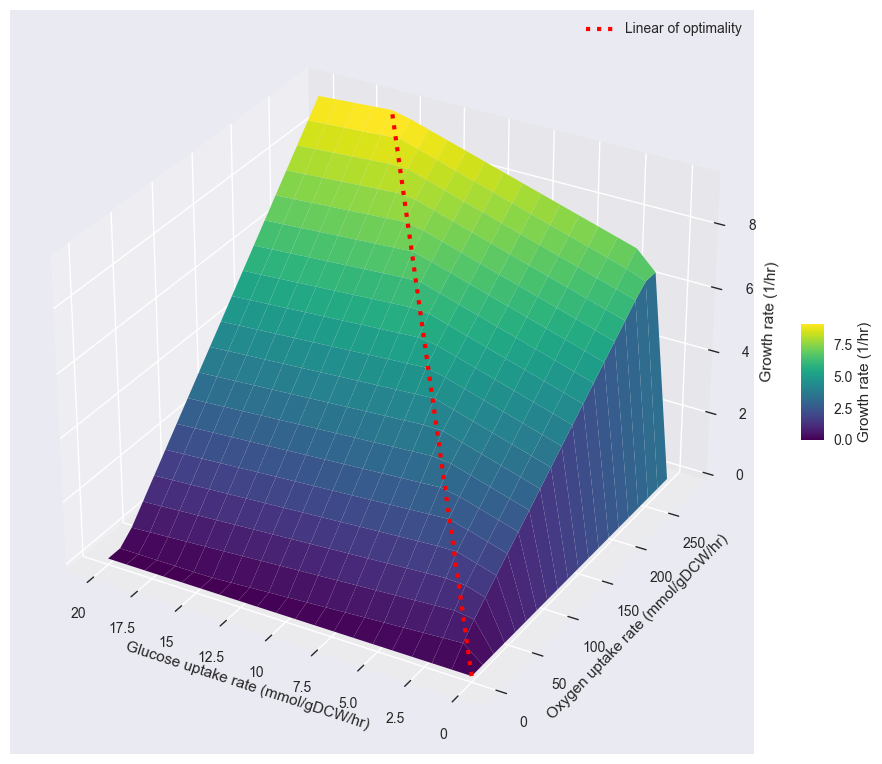

In [354]:
#Growth rate PPP visualization
x = Growth_rate_PPP['BOUNDARY_GLCe']
y = Growth_rate_PPP['BOUNDARY_O2e']
z = Growth_rate_PPP['flux_maximum']

# Reshape the data to form a grid
X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = np.array(z).reshape(X.shape)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, -Y, Z, cmap='viridis')

# Flatten the data to work with a list of points
points = list(zip(X.flatten(), -Y.flatten(), Z.flatten()))

# Find the steepest path to the highest point
highest_point = max(points, key=lambda p: p[2])
start = (0, 0, 0)  # Start point, could be any point
path = dijkstra(start, highest_point, points)

# Extract X, Y, Z values for the steepest path
X_path = [point[0] for point in path]
Y_path = [point[1] for point in path]
Z_path = [point[2] for point in path]

# Plot the steepest path
ax.plot(X_path, Y_path, Z_path, color='red', label='Linear of optimality', linestyle=':', linewidth = 3)


# Set labels
ax.set_xlabel('Glucose uptake rate (mmol/gDCW/hr)')
ax.set_ylabel('Oxygen uptake rate (mmol/gDCW/hr)')
ax.set_zlabel('Growth rate (1/hr)')

# Set the x-axis ticks and labels to display positive values
ax.set_xticklabels(["", "20", "17.5", "15", "12.5", "10", "7.5", "5.0", "2.5", "0"])

# Colorbar
cbar = fig.colorbar(surf, shrink=0.15, aspect=5) 
# Set the label for the color scale
cbar.set_label('Growth rate (1/hr)')

# Show legend for the steepest path
ax.legend()

plt.show()

C:\Users\boysa\AppData\Local\Temp\ipykernel_13032\2322631289.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "20", "17.5", "15", "12.5", "10", "7.5", "5.0", "2.5", "0"])


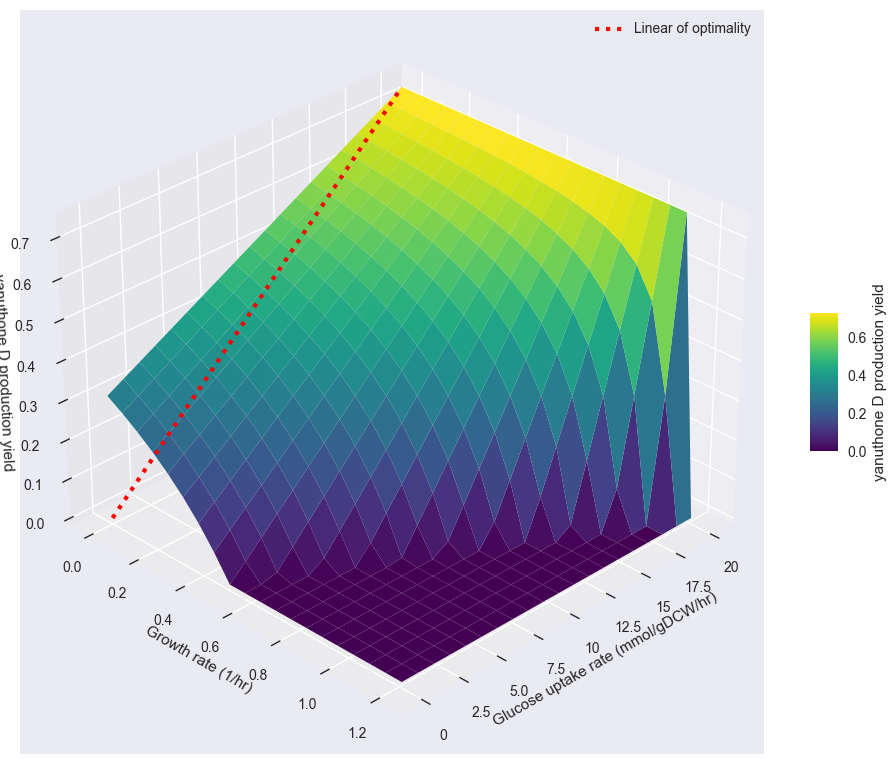

In [367]:
#yanuthone D production PPP analysis
x = yanD_PPP['BOUNDARY_GLCe']
y = yanD_PPP['DRAIN_Biomass']
z = yanD_PPP['carbon_yield_maximum']


# Reshape the data to form a grid
X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = np.array(z).reshape(X.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Flatten the data to work with a list of points
points = list(zip(X.flatten(), Y.flatten(), Z.flatten()))

# Find the steepest path to the highest point
highest_point = max(points, key=lambda p: p[2])
start = (0, 0, 0)  # Start point, could be any point
path = dijkstra(start, highest_point, points)

# Extract X, Y, Z values for the steepest path
X_path = [point[0] for point in path]
Y_path = [point[1] for point in path]
Z_path = [point[2] for point in path]

# Plot the steepest path
ax.plot(X_path, Y_path, Z_path, color='red', label='Linear of optimality', linestyle=':', linewidth = 3)


# Set labels
ax.set_xlabel('Glucose uptake rate (mmol/gDCW/hr)')
ax.set_ylabel('Growth rate (1/hr)')
ax.set_zlabel('yanuthone D production yield')

# Set the y-axis ticks and labels to display positive values
ax.set_xticklabels(["", "20", "17.5", "15", "12.5", "10", "7.5", "5.0", "2.5", "0"])

# Colorbar
cbar = fig.colorbar(surf, shrink=0.15, aspect=5) 
# Set the label for the color scale
cbar.set_label('yanuthone D production yield')

# Show legend for the steepest path
ax.legend()

# Rotate the plot (change the angles as needed)
ax.view_init(elev=30, azim=45)  # Set the elevation (vertical) and azimuth (horizontal) angles

plt.show()